In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import pandas as pd

from expected_tackling.visualization import Explainer

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [3]:
features_data = pd.read_csv("../data/features_mott.csv")

In [4]:
model = pickle.load(open("../models/model_mott.pkl", "rb"))

In [7]:
y = features_data["pff_missedTackle"].astype(int)
X = features_data[features_data["ott"]<10].drop(
    columns=["gameId", "playId", "nflId", "pff_missedTackle"]
)

y_pred = pd.Series(model.predict(X), name="prediction", index=X.index)
sample = pd.concat([y_pred[y_pred==1], y_pred[y_pred==0].sample(len(y_pred[y_pred==1]))]).index

explainer = Explainer(X.loc[sample], y.loc[sample], model)

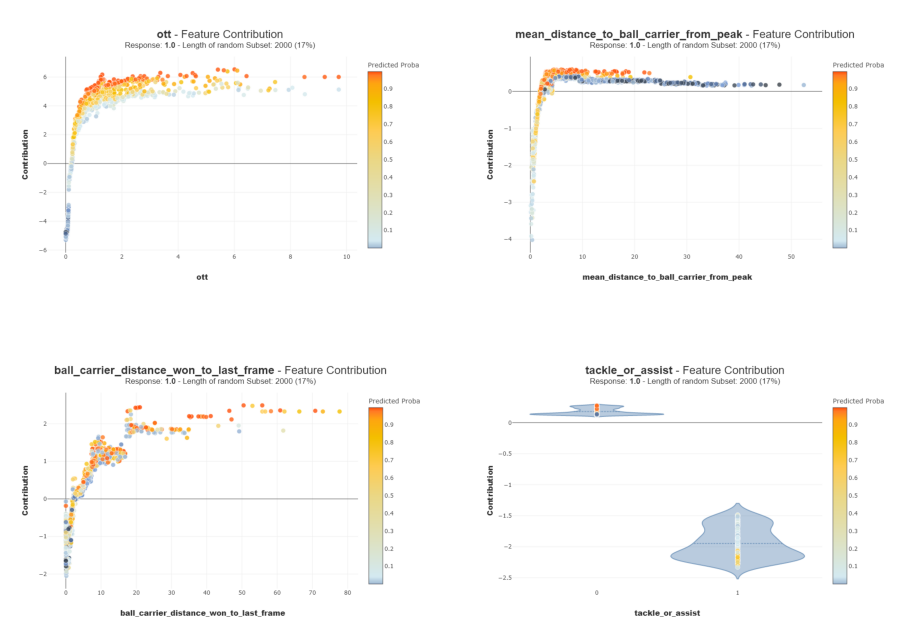

In [8]:
explainer.plot_contributions_examples(
    ["ott", "mean_distance_to_ball_carrier_from_peak", "ball_carrier_distance_won_to_last_frame", "tackle_or_assist"],
    "mott_contributions_examples",
)

In [9]:
app = explainer.run_app()

c:\Users\mleca\Anaconda3\envs\nfl_bowl\lib\site-packages\shapash\webapp\smart_app.py:121: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

c:\Users\mleca\Anaconda3\envs\nfl_bowl\lib\site-packages\shapash\webapp\utils\utils.py:41: FutureWarning:

Index.is_numeric is deprecated. Use pandas.api.types.is_any_real_numeric_dtype instead

INFO:root:Your Shapash application run on http://DESKTOP-UHH8TPO:8050/


Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/

INFO:root:Use the method .kill() to down your app.


 * Serving Flask app 'shapash.webapp.smart_app'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://172.20.10.2:8050
INFO:werkzeug:Press CTRL+C to quit
